<img src="https://i.pinimg.com/564x/aa/55/41/aa5541d265687d1fb50d15e6088013d6.jpg" width="1200" height="150" align="center">

## **DATA CLEANING WITH PANDAS**
---

>According to IBM Data Analytics you can expect to spend up to 80% of your time cleaning data.

### *`Sources of Missing Values`*
> Sebelum kita masuk ke coding, penting untuk memahami sumber dari data yang hilang.

> Sebelum kalian mulai membersihkan kumpulan data, ada baiknya kalian memahami data secara umum. Setelah itu, kalian bisa menyusun rencana untuk membersihkan data.

Beberapa `alasan umum mengapa data bisa hilang`:
1. Pengguna lupa mengisi kolom.
2. Data hilang saat mentransfer secara manual dari database lama.
3. Terjadi kesalahan pemrograman.
4. Pengguna memilih untuk tidak mengisi bidang yang terkait dengan keyakinan mereka tentang bagaimana hasil akan digunakan atau ditafsirkan.

Seperti yang kalian lihat, beberapa penyebab diatas hanyalah kesalahan yang sederhana. Namun, mungkin ada alasan yang lebih dalam mengapa data hilang.

    Sebelum kalian mulai membersihkan kumpulan data, ada baiknya kalian memahami data secara umum. Setelah itu, kalian bisa menyusun rencana untuk membersihkan data.

Mulailah dengan menanyakan pertanyaan-pertanyaan berikut:
- Apa saja fiturnya?
- Apa tipe yang diharapkan (int, float, string, boolean)?
- Apakah ada data yang hilang (nilai yang dapat dideteksi Panda)?
- Apakah ada jenis data lain yang hilang yang tidak begitu jelas (tidak dapat dengan mudah dideteksi dengan Pandas)?

`Aspek-aspek yang harus diperhatikan` saat cleaning data :
- Complete
- Correct
- Accurate
- Relevant

In [3]:
# import library/module terlebih dahulu
import numpy as np
import pandas as pd
import requests
import math
from ast import Pass

##### *READ.CSV()*

In [2]:
# Cara 1
# Membuat dataframe dari file csv dalam bentuk link
df = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/property_data.csv')

In [5]:
# Cara 2
url = "https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/property_data.csv"

In [7]:
import requests

def downloadDataSet(url,destNameFile): 
    """
    Download Data Set
    """
    response = requests.get(url)
    if response.status_code == 200: 
        with open(destNameFile, 'wb') as f:
            f.write(response.content)
        
        response.close()
        return True 
    
    response.close()
    print("Request Error , http statuscode : ",response.status_code)
    return False 

In [11]:
namaFile = "property_data.csv"
status = downloadDataSet(url,namaFile)
print(status)

True


##### *HEAD()*

Method `.head()` untuk melihat beberapa baris pertama.

In [3]:
df.head(5)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600


#### **APA SAJA FITURNYA?**

Sekarang kita dapat menjawab pertanyaan awal kita, apa saja fiturnya? Cukup mudah untuk menyimpulkan fitur-fitur berikut dari nama kolom:

- ST_NUM: Street number
- ST_NAME: Street name
- OWN_OCCUPIED: Is the residence owner occupied
- NUM_BEDROOMS: Number of bedrooms

#### **APA SAJA TIPE DATA YANG DIHARAPKAN?**

Kita juga bisa menjawab, tipe apa yang diharapkan?

- ST_NUM: float or int… some sort of numeric type
- ST_NAME: string
- OWN_OCCUPIED: string… Y (“Yes”) or N (“No”)
- NUM_BEDROOMS: float or int, a numeric type

**INFO()**

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PID           8 non-null      float64
 1   ST_NUM        7 non-null      float64
 2   ST_NAME       9 non-null      object 
 3   OWN_OCCUPIED  8 non-null      object 
 4   NUM_BEDROOMS  7 non-null      object 
 5   NUM_BATH      8 non-null      object 
 6   SQ_FT         8 non-null      object 
dtypes: float64(2), object(5)
memory usage: 632.0+ bytes


Untuk menjawab dua pertanyaan berikutnya, kita perlu mulai mempelajari Pandas lebih jauh. Mari kita lihat contoh cara mendeteksi missing values.

In [13]:
dfa = pd.DataFrame([[2,3,1], [3,2,2], [2,4,4]],
                  columns=list("ABC"))
dfa

,A,B,C
0,2,3,1
1,3,2,2
2,2,4,4


In [14]:
dfa.apply?

Signature:
dfa.apply(
    func: 'AggFuncType',
    axis: 'Axis' = 0,
    raw: 'bool' = False,
    result_type: "Literal['expand', 'reduce', 'broadcast'] | None" = None,
    args=(),
    **kwargs,
)
Docstring:
Apply a function along an axis of the DataFrame.

Objects passed to the function are Series objects whose index is
either the DataFrame's index (``axis=0``) or the DataFrame's columns
(``axis=1``). By default (``result_type=None``), the final return type
is inferred from the return type of the applied function. Otherwise,
it depends on the `result_type` argument.

Parameters
----------
func : function
    Function to apply to each column or row.
axis : {0 or 'index', 1 or 'columns'}, default 0
    Axis along which the function is applied:

    * 0 or 'index': apply function to each column.
    * 1 or 'columns': apply function to each row.

raw : bool, default False
    Determines if row or column is passed as a Series or ndarray object:

    * ``False`` : passes each row or column

In [16]:
dfa

,A,B,C
0,2,3,1
1,3,2,2
2,2,4,4


---
**APPLY()**

Secara default fungsi apply memiliki parameter axis yang diberi nilai 0 yang berarti fungsi yang dipanggil oleh apply akan diterapkan pada semua kolom.

**LAMBDA()**

Lambda expression di Python adalah sebuah ekspresi untuk membuat fungsi.

Berkat lambda, kita bisa membuat fungsi tanpa nama atau dikenal juga dengan anonymous function. Nah, dengan lambda,`kita tidak perlu menggunakan def dan return, bahkan kita juga tidak perlu menuliskan namanya.`

---

In [15]:
dfa.apply(lambda x : x['A'], axis =1)

0    2
1    3
2    2
dtype: int64

In [17]:
# Error KeyError: 'A'
dfa.apply(lambda x : x['A'], axis =0)

KeyError: 'A'

In [18]:
dfa.apply(lambda x : x, axis =1)

,A,B,C
0,2,3,1
1,3,2,2
2,2,4,4


In [21]:
dfa.iloc[0:1,]  # ambil baris dengan index 0 saja
# 0:1, 1 not include row, get all column, shape 1,3, ndim 2 dim

,A,B,C
0,2,3,1


In [22]:
dfa.loc[0] # untuk akses group of rows and column by label(s) / boolean array
# default axis=0, ndim 1 dim, shape 3,1

A    2
B    3
C    1
Name: 0, dtype: int64

In [23]:
dfa.loc[0:1]    # 2 dimensi, loc m:n n is include
# .loc

,A,B,C
0,2,3,1
1,3,2,2


In [24]:
dfa.iloc[0]

A    2
B    3
C    1
Name: 0, dtype: int64

In [25]:
dfa.iloc[0:1]   # bisa diakses dari index, m:n -> n not include

,A,B,C
0,2,3,1


Kita ingin memberikan warna merah pada dataframe variabel dfa, jika data tersebut harus lebih besar dari baris 0 [2,3,1].

Coba ubah axis

2 >  [2,3,1]

3 > [2,3,1]

1 >

- axis = 0 -> kolom 
- axis = 1 -> baris

In [31]:
dfa.iloc[0]

A    2
B    3
C    1
Name: 0, dtype: int64

In [33]:
dfa.style.apply(lambda x:
                ["background: red" if v >= x.iloc[0]
                else ""
                for v in x],
                axis = 0)

,A,B,C
0,2,3,1
1,3,2,2
2,2,4,4


In [34]:
dfx = pd.DataFrame([[4, 9]] * 3, columns=['A', 'B'])
dfx

,A,B
0,4,9
1,4,9
2,4,9


In [35]:
dfx.apply(np.sqrt)

,A,B
0,2.0,3.0
1,2.0,3.0
2,2.0,3.0


In [36]:
dfx.apply(np.sum, axis=0) # apply utk tiap kolom

A    12
B    27
dtype: int64

In [37]:
dfx.apply(np.sum, axis=1) # apply utk tiap baris 

0    13
1    13
2    13
dtype: int64

In [38]:
# Returning a list-like will result in a Series [1.2]
dfx.apply(lambda x: [1, 2],
            axis=1)

0    [1, 2]
1    [1, 2]
2    [1, 2]
dtype: object

In [39]:
# Passing ``result_type='expand'`` will expand list-like results to columns of a Dataframe
dfx.apply(lambda x: [1, 2],
            axis=1,
            result_type='expand')

,0,1
0,1,2
1,1,2
2,1,2


In [40]:
dfx.apply(lambda x: pd.Series([1, 2],
            index=['foo', 'bar']),
            axis=1)

,foo,bar
0,1,2
1,1,2
2,1,2


### **Standard Missing Values**
> Standard missing values adalah missing values yang dapat dideteksi/dikenali Pandas.

Kembali ke dataset original kita, mari kita lihat kolom "Street Number".

In [90]:
df.head(9)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,--,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


In [165]:
street_num = df.loc[:,['ST_NUM']] # get all rows, choose ST_NUM column
street_num

,ST_NUM
0,104.0
1,197.0
2,NaN
3,201.0
4,203.0
5,207.0
6,NaN
7,213.0
8,215.0


In [166]:
import math
# FUNGSI UNTUK MENGHIGHLIGHT MISSING VALUE DI DATAFRAME
def highlight_column_nan(column):
    """
    Function untuk me-return background-color
    """
    highlight = 'background-color: palegreen;'
    default = ''
    return [highlight if math.isnan(v) 
                      else default
                        for v in column]

#return [highlight if str(v) == str(1e400*0) 
#                   else default
#                     for v in column]

---
**df.apply?**

* 0 or 'index': apply function to each column.
* 1 or 'columns': apply function to each row.

agak berbeda dengan dataframe axis = 0 baris , axis = 1 kolom

---

In [167]:
df.style.apply(highlight_column_nan,    # apply fungsi highlight
              subset=['ST_NUM'],    # ambil kolom ST_NUM
              axis=0)   # axis = 0 itu baris

#df.style.apply(highlight_column_nan,
#                subset=['ST_NUM'],
#                axis=0)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.000000,104.000000,PUTNAM,Y,3,1,1000
1,100002000.000000,197.000000,LEXINGTON,N,3,1.5,--
2,100003000.000000,nan,LEXINGTON,N,nan,1,850
3,100004000.000000,201.000000,BERKELEY,12,1,nan,700
4,nan,203.000000,BERKELEY,Y,3,2,1600
5,100006000.000000,207.000000,BERKELEY,Y,nan,1,800
6,100007000.000000,nan,WASHINGTON,nan,2,HURLEY,950
7,100008000.000000,213.000000,TREMONT,Y,--,1,nan
8,100009000.000000,215.000000,TREMONT,Y,na,2,1800


In [168]:
# untuk menampilkan beberapa kolom
street_num = df.loc[:,['ST_NUM','ST_NAME','NUM_BEDROOMS','OWN_OCCUPIED']]
street_num

,ST_NUM,ST_NAME,NUM_BEDROOMS,OWN_OCCUPIED
0,104.0,PUTNAM,3,Y
1,197.0,LEXINGTON,3,N
2,NaN,LEXINGTON,NaN,N
3,201.0,BERKELEY,1,12
4,203.0,BERKELEY,3,Y
5,207.0,BERKELEY,NaN,Y
6,NaN,WASHINGTON,2,NaN
7,213.0,TREMONT,--,Y
8,215.0,TREMONT,na,Y


<img src="https://miro.medium.com/max/830/0*veOKXtXllBUoIOr-.jpg" width="1200" align="center">

Di baris ketiga ada sel kosong. Di baris ketujuh ada nilai "NA".

Jelas ini adalah missing values. Mari kita lihat bagaimana Pandas menangani ini.

In [169]:
# menampilkan st_num
df['ST_NUM']

0    104.0
1    197.0
2      NaN
3    201.0
4    203.0
5    207.0
6      NaN
7    213.0
8    215.0
Name: ST_NUM, dtype: float64

**ISNULL()**

Method `.isnull()` atau `.isna()` untuk mengonfirmasi missing value yang biasa dikenal dengan "NA".

In [170]:
df['ST_NUM'].isnull()

0    False
1    False
2     True
3    False
4    False
5    False
6     True
7    False
8    False
Name: ST_NUM, dtype: bool

`Melihat kolom tersebut, kita dapat melihat bahwa Pandas mengisi ruang kosong dengan “NA”`. Dengan menggunakan metode `isnull()`, kita dapat mengonfirmasi bahwa missing value dan "NA" dikenali sebagai missing value. Kedua tanggapan boolean itu Benar.

Ini adalah contoh sederhana, tetapi menyoroti poin penting. Pandas akan mengenali sel kosong dan tipe "NA" sebagai missing value.

Di bagian selanjutnya, kita akan melihat beberapa jenis yang tidak akan dikenali Pandas.

### **Non-Standard Missing Values**
> Disini kita akan menangani masalah kasus missing value dengan format yang tidak biasa

Mari kita lihat kolom "Number of Bedrooms".

In [133]:
df.head(10)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,--,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


<img src=https://miro.medium.com/max/830/0*wlRcCspEXuvanHPP.jpg width="1200" align="center">

Di kolom ini, ada empat missing values.

- n/a
- NA
- —
- na

Dari bagian sebelumnya, kita tahu bahwa Pandas akan mengenali “NA” sebagai missing value, tapi bagaimana dengan yang lain? Mari lihat.

In [134]:
df['NUM_BEDROOMS']

0      3
1      3
2    NaN
3      1
4      3
5    NaN
6      2
7     --
8     na
Name: NUM_BEDROOMS, dtype: object

In [135]:
df['NUM_BEDROOMS'].isnull()
# konfirmasi missing value benar atau salah

0    False
1    False
2     True
3    False
4    False
5     True
6    False
7    False
8    False
Name: NUM_BEDROOMS, dtype: bool

Sama seperti sebelumnya, Pandas mengenali "NA" sebagai missing value. Sayangnya, jenis lainnya tidak dikenali.

**CONTOH KASUS 1 :**
> Jika ada beberapa users yang memasukkan data secara manual, ini adalah masalah umum. Mungkin beberapa suka menggunakan "n / a" tapi kalian suka menggunakan "na".

Cara mudah untuk mendeteksi berbagai format ini adalah dengan memasukkannya ke dalam list. Kemudian saat kami mengimpor data, Pandas akan langsung mengenalinya.

Berikut adalah contoh bagaimana kita melakukannya.

In [194]:
# Membuat list yang isinya missing value yang tidak umum
missing_values = ["n/a", "na", "--"]

In [178]:
# FUNGSI UNTUK MENGHIGHLIGHT MISSING VALUE DI DATAFRAME
def highlight_column_missing_values(column):
    """
    Function untuk me-return background-color
    """
    highlight = 'background-color: yellow;'
    default = ''
    return [highlight if str(v) == str(1e400*0)  or v in missing_values
                      else default
                        for v in column]

#return [highlight if str(v) == str(1e400*0) 
#                   else default
#                     for v in column]

In [179]:
df.style.apply(highlight_column_missing_values,    # apply fungsi highlight
              subset=['NUM_BEDROOMS'],    # ambil kolom NUM_BEDROOMS
              axis=0)   # axis = 0 itu baris

#df.style.apply(highlight_column_missing_values,
#                subset=['NUM_BEDROOMS'],
#                axis=0)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.000000,104.000000,PUTNAM,Y,3,1,1000
1,100002000.000000,197.000000,LEXINGTON,N,3,1.5,--
2,100003000.000000,125.000000,LEXINGTON,N,nan,1,850
3,100004000.000000,201.000000,BERKELEY,12,1,nan,700
4,nan,203.000000,BERKELEY,Y,3,2,1600
5,100006000.000000,207.000000,BERKELEY,Y,nan,1,800
6,100007000.000000,nan,WASHINGTON,nan,2,HURLEY,950
7,100008000.000000,213.000000,TREMONT,Y,--,1,nan
8,100009000.000000,215.000000,TREMONT,Y,na,2,1800


---
**NA_VALUES**

untuk mengubah missing value yang tidak umum ke NaN

---

In [195]:
df = pd.read_csv("property_data.csv", na_values = missing_values)

In [181]:
df.style.apply(highlight_column_missing_values,    # apply fungsi highlight
              subset=['NUM_BEDROOMS'],    # ambil kolom NUM_BEDROOMS
              axis=0)   # axis = 0 itu baris

#df.style.apply(highlight_column_missing_values,
#                subset=['NUM_BEDROOMS'],
#                axis=0)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.000000,104.000000,PUTNAM,Y,3.000000,1,1000.000000
1,100002000.000000,197.000000,LEXINGTON,N,3.000000,1.5,nan
2,100003000.000000,nan,LEXINGTON,N,nan,1,850.000000
3,100004000.000000,201.000000,BERKELEY,12,1.000000,nan,700.000000
4,nan,203.000000,BERKELEY,Y,3.000000,2,1600.000000
5,100006000.000000,207.000000,BERKELEY,Y,nan,1,800.000000
6,100007000.000000,nan,WASHINGTON,nan,2.000000,HURLEY,950.000000
7,100008000.000000,213.000000,TREMONT,Y,nan,1,nan
8,100009000.000000,215.000000,TREMONT,Y,nan,2,1800.000000


In [182]:
# untuk menampilkan beberapa kolom
street_num = df.loc[:,['ST_NUM','ST_NAME','NUM_BEDROOMS','OWN_OCCUPIED']]
street_num

,ST_NUM,ST_NAME,NUM_BEDROOMS,OWN_OCCUPIED
0,104.0,PUTNAM,3.0,Y
1,197.0,LEXINGTON,3.0,N
2,NaN,LEXINGTON,NaN,N
3,201.0,BERKELEY,1.0,12
4,203.0,BERKELEY,3.0,Y
5,207.0,BERKELEY,NaN,Y
6,NaN,WASHINGTON,2.0,NaN
7,213.0,TREMONT,NaN,Y
8,215.0,TREMONT,NaN,Y


In [183]:
df['NUM_BEDROOMS']

0    3.0
1    3.0
2    NaN
3    1.0
4    3.0
5    NaN
6    2.0
7    NaN
8    NaN
Name: NUM_BEDROOMS, dtype: float64

In [184]:
# kita coba lakukan pengecekan menggunakan is null
df['NUM_BEDROOMS'].isnull()
# perhatikan baris 2, 5, 7 dan 8 

0    False
1    False
2     True
3    False
4    False
5     True
6    False
7     True
8     True
Name: NUM_BEDROOMS, dtype: bool

Kali ini, semua format berbeda dikenali sebagai missing values.

Kalian mungkin tidak dapat langsung menangkap semua ini. Saat kalian mengerjakan data dan melihat tipe lain dari nilai yang hilang, kalian bisa menambahkannya ke daftar.

Penting untuk mengenali jenis missing values non-standar ini untuk tujuan meringkas dan mengubah missing values. Jika kalian mencoba dan menghitung jumlah nilai yang hilang sebelum mengonversi jenis non-standar ini, kalian bisa kehilangan banyak missing values.

Di bagian selanjutnya kita akan melihat jenis missing values yang lebih rumit, tetapi sangat umum.

### **Unexpected Missing Values**
> Sejauh ini kita telah melihat standard missing values, dan non-standard missing values. Bagaimana jika kita memiliki tipe yang tidak terduga?

**CONTOH KASUS 1 :**
>Misalnya, jika fitur kita diharapkan berupa string, tetapi malah jenisnya numerik, maka secara teknis ini juga merupakan missing value.

Mari kita lihat kolom "Owner Occupied" untuk mengetahuinya.

In [144]:
values_real = ["Y", "N", "y","n"]

def highlight_column_criteria_values(column):    
    highlight = 'background-color: yellow;'
    default = ''
    return [default if v in values_real
            else highlight
            for v in column]

# return [highlight if str(v) == str(1e400*0)
#         else default
#         for v in column]

In [145]:
street_num.style.apply(highlight_column_criteria_values,
                       subset=['OWN_OCCUPIED'],
                       axis=0)

,ST_NUM,ST_NAME,NUM_BEDROOMS,OWN_OCCUPIED
0,104.000000,PUTNAM,3.000000,Y
1,197.000000,LEXINGTON,3.000000,N
2,nan,LEXINGTON,nan,N
3,201.000000,BERKELEY,1.000000,12
4,203.000000,BERKELEY,3.000000,Y
5,207.000000,BERKELEY,nan,Y
6,nan,WASHINGTON,2.000000,nan
7,213.000000,TREMONT,nan,Y
8,215.000000,TREMONT,nan,Y


<img src="https://miro.medium.com/max/829/0*RPJE5nhrI0Kgu2ls.jpg" width="1200">

In [146]:
df['OWN_OCCUPIED']

0      Y
1      N
2      N
3     12
4      Y
5      Y
6    NaN
7      Y
8      Y
Name: OWN_OCCUPIED, dtype: object

In [147]:
df['OWN_OCCUPIED'].isnull()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
7    False
8    False
Name: OWN_OCCUPIED, dtype: bool

Di baris keempat, ada angka 12. Respons untuk Owner Occupied jelas harus berupa string (Y atau N), jadi tipe numerik ini berupa missing value.

Contoh ini sedikit lebih rumit sehingga kita perlu memikirkan strategi untuk mendeteksi jenis nilai yang hilang ini.

Ada sejumlah pendekatan berbeda, tetapi inilah cara kita akan mengatasinya.

* Loop pada kolom OWN_OCCUPIED
* Kita coba ubah semua entry menjadi integer
* Jika entry tidak dapat diubah menjadi integer, tandai sebagai missing value
* Jika tidak dapat menjadi integer, maka kita tau kalau entry adalah string, keep going

Mari kita lihat kodenya dan kemudian kita akan membahasnya secara mendetail.

In [150]:
from ast import Pass

cnt=0   # 
for row in df['OWN_OCCUPIED']:  # untuk baris yang ada di kolom OWN_OCCUPIED
    try:
        int(row)    # ubah entri menjadi integer tiap barisnya
        df.loc[cnt, 'OWN_OCCUPIED']=np.nan
        # disini akan kelihatan dimana yang tidak bisa diubah
        # ke integer itu adalah string
        # dengan np.nan maka otomatis entri berubah menjadi NaN
    except ValueError:  # yang tidak bisa diubah ke integer akan
        pass            # dilewati
    cnt+=1  # berguna untuk menambah jumlah looping?

In [151]:
df.head(9)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


Dalam kode diatas, kita looping setiap entri di kolom "Owner Occupied". Untuk mencoba dan mengubah entri menjadi integer, kita menggunakan `int(row)`.

Jika nilai dapat diubah menjadi bilangan bulat, kita mengubah entri menjadi missing value menggunakan `np.nan Numpy`.

Di sisi lain, jika tidak dapat diubah menjadi bilangan bulat, kita `pass` dan keep going.

Kalian akan melihat bahwa `kita menggunakan try dan except ValueError`. Ini disebut `exception handling`, dan kita menggunakan ini `untuk menangani errors.`

Jika kita mencoba dan mengubah entri menjadi integer dan tidak dapat diubah, `ValueError akan di return`, dan `kode akan berhenti`. Untuk mengatasi ini, kita menggunakan exception handling untuk mengenali error ini, dan terus berjalan.

### **Summarizing Missing Values**
> Setelah kita membersihkan missing values, kita mungkin ingin melihat summary-nya.

**CONTOH KASUS 1 :**
>Misalnya, kita mungkin ingin melihat jumlah total missing values untuk setiap feature.

In [152]:
df.isnull().sum()
# isnull() untuk mendeteksi missing values di setiap fitur
# sum() untuk menjumlahkannya

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    2
NUM_BEDROOMS    4
NUM_BATH        1
SQ_FT           2
dtype: int64

**CONTOH KASUS 2 :**
> Apakah kita memiliki missing values sama sekali?

In [153]:
df.isnull().values.any()

True

**CONTOH KASUS 3 :**
> Bagaimana kita bisa mengetahui jumlah total missing values dari fitur-fitur?

In [154]:
df.isnull().sum().sum()

12

### **Replacing**
> Seringkali kalian harus memikirkan bagaimana kalian menangani missing values.

> Terkadang kalian hanya ingin menghapus baris tersebut, di lain waktu kalian menggantinya.

In [156]:
df.head(9)  # jangan di run

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


**CONTOH KASUS 1 :**
> Replacing missing values dengan single value

Mungkin kalian hanya ingin mengisi missing values dengan single value

In [189]:
df['ST_NUM'].fillna(125, inplace=True)
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,125.0,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,125.0,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,--,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


**CONTOH KASUS 2 :**
> Replacing missing values dengan location based imputation

Kemungkinan besar, kalian mungkin ingin melakukan imputasi berbasis lokasi/location based imputation. Inilah cara kalian melakukannya.

In [191]:
df.loc[2, 'ST_NUM'] = 125
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,125.0,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,--,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


**CONTOH KASUS 3 :**
> Replacing missing values dengan median

Cara yang sangat umum untuk mengganti missing values menggunakan median.

In [197]:
median = df['NUM_BEDROOMS'].median()
median

3.0

In [198]:
df['NUM_BEDROOMS'].fillna(median, inplace=True)
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,3.0,1,850.0
3,100004000.0,201.0,BERKELEY,12,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,3.0,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,3.0,1,NaN
8,100009000.0,215.0,TREMONT,Y,3.0,2,1800.0


## **OIL SPILL DATASET**
---

### **IMPORT PUSTAKA**

In [2]:
# pustaka utama
import pandas as pd
import numpy as np

# membaca file csv bisa pandas/numpy
from pandas import read_csv
from numpy import loadtxt

from numpy import unique

### **NUMBER OF UNIQUE**

Sebelum Cleaning Dataset oil spill  kita coba latihan untuk number of unique

In [9]:
# Creating the first dataframe 
dfz = pd.DataFrame({"A":[14, 4, 5, 4, 1],
                   "B":[5, 2, 54, 3, 2],
                   "C":[20, 20, 7, 3, 8],
                    "D":[14, 3, 6, 2, 6]})
  
# Print the dataframe
dfz

,A,B,C,D
0,14,5,20,14
1,4,2,20,3
2,5,54,7,6
3,4,3,3,2
4,1,2,8,6


**`NUNIQUE()`**

Method `df.nunique()` digunakan untuk menemukan nilai unik di sepanjang sumbu kolom.

In [10]:
dfz.nunique(axis=1) 

0    3
1    4
2    4
3    3
4    4
dtype: int64


| row | values | unix |
|:----|:----|:-----|
|0|14, 5, 20, 14|3|
|1|4, 2, 20, 3|4|


In [11]:
dfz.nunique(axis=0) 

A    4
B    4
C    4
D    4
dtype: int64

| column | values | unix |
|:----|:----|:-----|
|A|14, 4, 5, 4, 1|4|
|B|5, 2, 54, 3, 2|4|

In [12]:
df = pd.DataFrame({'A': [1, 2, 3], 'B': [1, 1, 1]})
print(df)

   A  B
0  1  1
1  2  1
2  3  1


In [13]:
df.nunique()

A    3
B    1
dtype: int64

### **DATA LOADING**

In [3]:
# pustaka pandas pakainya read_csv
from pandas import read_csv

osd1 = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/oil-spill.csv',
                header=None)
print(type(osd1))

<class 'pandas.core.frame.DataFrame'>


In [4]:
# pustaka numpy pakainya loadtxt
from numpy import loadtxt

osd2 = loadtxt('https://raw.githubusercontent.com/jbrownlee/Datasets/master/oil-spill.csv',
               delimiter=',')
print(type(osd2))

<class 'numpy.ndarray'>


In [32]:
osd1.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1,2558,1506.09,456.63,90,6395000.0,40.88,7.89,29780.0,0.19,...,2850.00,1000.00,763.16,135.46,3.73,0,33243.19,65.74,7.95,1
1,2,22325,79.11,841.03,180,55812500.0,51.11,1.21,61900.0,0.02,...,5750.00,11500.00,9593.48,1648.80,0.60,0,51572.04,65.73,6.26,0
2,3,115,1449.85,608.43,88,287500.0,40.42,7.34,3340.0,0.18,...,1400.00,250.00,150.00,45.13,9.33,1,31692.84,65.81,7.84,1
3,4,1201,1562.53,295.65,66,3002500.0,42.40,7.97,18030.0,0.19,...,6041.52,761.58,453.21,144.97,13.33,1,37696.21,65.67,8.07,1
4,5,312,950.27,440.86,37,780000.0,41.43,7.03,3350.0,0.17,...,1320.04,710.63,512.54,109.16,2.58,0,29038.17,65.66,7.35,0


In [33]:
osd2

array([[1.00000e+00, 2.55800e+03, 1.50609e+03, ..., 6.57400e+01,
        7.95000e+00, 1.00000e+00],
       [2.00000e+00, 2.23250e+04, 7.91100e+01, ..., 6.57300e+01,
        6.26000e+00, 0.00000e+00],
       [3.00000e+00, 1.15000e+02, 1.44985e+03, ..., 6.58100e+01,
        7.84000e+00, 1.00000e+00],
       ...,
       [2.02000e+02, 1.40000e+01, 2.51400e+01, ..., 6.59100e+01,
        6.12000e+00, 0.00000e+00],
       [2.03000e+02, 1.00000e+01, 9.60000e+01, ..., 6.59700e+01,
        6.32000e+00, 0.00000e+00],
       [2.04000e+02, 1.10000e+01, 7.73000e+00, ..., 6.56500e+01,
        6.26000e+00, 0.00000e+00]])

### **DATA CLEANING**

#### **- IDENTIFIKASI KOLOM YANG MENGANDUNG NILAI TUNGGAL**
> Di bagian ini kita akan membahas mengenai **`prediktor varian nol`**, karena `benar-benar tidak ada variasi` yang ditampilkan oleh prediktor atau kolom.

Kolom yang memiliki satu pengamatan atau nilai mungkin tidak berguna untuk pemodelan.

Kolom atau prediktor ini disebut prediktor varian nol seolah-olah kita mengukur varians (nilai rata-rata dari mean), itu akan menjadi nol.

Ketika sebuah prediktor berisi nilai tunggal, kami menyebutnya prediktor varian nol karena benar-benar tidak ada variasi yang ditampilkan oleh prediktor.

**CONTOH KASUS 1 :**
> Rangkum jumlah unique values setiap kolom menggunakan numpy

**`UNIQUE()`**

Method `unique()` digunakan untuk mengembalikan array yang berisi nilai unik pada sebuah dataset. Berguna jika Anda ingin mengetahui terdapat nilai unik apa saja pada sebuah dataset.

In [24]:
from numpy import unique

for i in range(osd2.shape[1]):
    print(i, len(unique(osd2[:, i])))

# i = nama kolomnya
# osd2.shape[1] = get kolom
# untuk i dalam rentang kolom
# number of unique values dari data osd2 tiap kolomnya

0 238
1 297
2 927
3 933
4 179
5 375
6 820
7 618
8 561
9 57
10 577
11 59
12 73
13 107
14 53
15 91
16 893
17 810
18 170
19 53
20 68
21 9
22 1
23 92
24 9
25 8
26 9
27 308
28 447
29 392
30 107
31 42
32 4
33 45
34 141
35 110
36 3
37 758
38 9
39 9
40 388
41 220
42 644
43 649
44 499
45 2
46 937
47 169
48 286
49 2


**CONTOH KASUS 2 :**
> Merangkum jumlah unique values setiap kolom menggunakan pandas

**`NUNIQUE()`**

Method nunique() digunakan untuk mengembalikan jumlah nilai unik tersebut, perlu diperhatikan nilai NaN tidak akan dihitung.

In [40]:
from pandas import read_csv

dfunik = osd1.nunique()
print(dfunik)

# dfunik = mengembalikan list number of unique values tiap kolomnya
# dari data osd1.

0     238
1     297
2     927
3     933
4     179
5     375
6     820
7     618
8     561
9      57
10    577
11     59
12     73
13    107
14     53
15     91
16    893
17    810
18    170
19     53
20     68
21      9
22      1
23     92
24      9
25      8
26      9
27    308
28    447
29    392
30    107
31     42
32      4
33     45
34    141
35    110
36      3
37    758
38      9
39      9
40    388
41    220
42    644
43    649
44    499
45      2
46    937
47    169
48    286
49      2
dtype: int64


Pada index 22 hanya 1 jumlah yg unik dengan kata lain nilai nya sama semua.

In [9]:
osd1.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1,2558,1506.09,456.63,90,6395000.0,40.88,7.89,29780.0,0.19,...,2850.00,1000.00,763.16,135.46,3.73,0,33243.19,65.74,7.95,1
1,2,22325,79.11,841.03,180,55812500.0,51.11,1.21,61900.0,0.02,...,5750.00,11500.00,9593.48,1648.80,0.60,0,51572.04,65.73,6.26,0
2,3,115,1449.85,608.43,88,287500.0,40.42,7.34,3340.0,0.18,...,1400.00,250.00,150.00,45.13,9.33,1,31692.84,65.81,7.84,1
3,4,1201,1562.53,295.65,66,3002500.0,42.40,7.97,18030.0,0.19,...,6041.52,761.58,453.21,144.97,13.33,1,37696.21,65.67,8.07,1
4,5,312,950.27,440.86,37,780000.0,41.43,7.03,3350.0,0.17,...,1320.04,710.63,512.54,109.16,2.58,0,29038.17,65.66,7.35,0


In [48]:
# jmlunik = mengembalikan list number of unique values tiap kolomnya
# dari data osd1.

jmlunik = osd1.nunique()
print(jmlunik)

0     238
1     297
2     927
3     933
4     179
5     375
6     820
7     618
8     561
9      57
10    577
11     59
12     73
13    107
14     53
15     91
16    893
17    810
18    170
19     53
20     68
21      9
22      1
23     92
24      9
25      8
26      9
27    308
28    447
29    392
30    107
31     42
32      4
33     45
34    141
35    110
36      3
37    758
38      9
39      9
40    388
41    220
42    644
43    649
44    499
45      2
46    937
47    169
48    286
49      2
dtype: int64


**CONTOH KASUS 3 :**
> Hapus kolom yang mengandung nilai tunggal

**`ENUMERATE()`**

Method `enumerate()` berguna untuk mengonversi objek collection data menjadi objek enumerate. Enumerate mengembalikan objek yang berisi penghitung sebagai key untuk setiap nilai di dalam objek, membuat item dalam collection lebih mudah diakses.

In [49]:
# i = key
# v = values

to_del = [i for i,v in enumerate(jmlunik)
          if v == 1]
print(to_del)

# for i,v in enumerate(jmlunik) looping dulu i key , v value 
#      if v == 1  
#          i 

[22]


In [10]:
# ukuran asli data osd1 sebelum kolom `jmlunik` dihapus
osd1.shape

(937, 50)

In [52]:
# get number of unique values for each column 
counts = osd1.nunique()

# counts = mengembalikan list number of unique values tiap kolomnya
# dari data osd1.

# record columns to delete
to_del = [i for i,v in enumerate(counts) if v == 1]
print(to_del)

# drop useless columns
# menghapus kolom 'counts' dalam data osd1
osd1.drop(to_del, axis=1, inplace=True) 

# kita cek kembali ukuran data osd1
print(osd1.shape)

# axis=1 -> kolom
# inplace=True -> perubahan permanen

[22]
(937, 49)


#### **- PERTIMBANGKAN KOLOM YANG MEMILIKI NILAI SANGAT SEDIKIT**
> Di bagian ini kita akan membahas mengenai **`prediktor varian mendekati nol`**, karena variansnya bukan nol, tetapi *`angka yang sangat kecil mendekati nol`*.

Di bagian sebelumnya, kita melihat bahwa beberapa kolom dalam contoh dataset memiliki nilai unik yang sangat sedikit. 

Di bagian ini kita akan membahas mengenai **`prediktor varian mendekati nol`**, karena variansnya bukan nol, tetapi *`angka yang sangat kecil mendekati nol`*.

Misalnya, ada kolom yang hanya memiliki 2, 4, dan 9 nilai unik. Ini mungkin masuk akal untuk variabel ordinal atau kategoris. Dalam hal ini, bagaimanapun, dataset hanya berisi variabel numerik. 

Dengan demikian, hanya memiliki 2, 4, atau 9 nilai numerik unik dalam sebuah kolom mungkin mengejutkan.

Tergantung pada pilihan persiapan data dan algoritma pemodelan, *`variabel dengan nilai numerik yang sangat sedikit juga dapat menyebabkan kesalahan atau hasil yang tidak diharapkan.`* 

Sebagai contoh, saya telah melihat mereka menyebabkan kesalahan `saat menggunakan transformasi daya untuk persiapan data dan ketika memasang model linier yang mengasumsikan distribusi probabilitas data yang masuk akal.`

In [53]:
osd2.shape

(937, 50)

**CONTOH KASUS 1 :**
> Rangkum persentase dari unique values tiap kolom menggunakan numpy

In [6]:
print("SHAPE")
print(osd2.shape)

print("\nBARIS")
print("range(osd2.shape[0])")
print(range(osd2.shape[0])) # get baris

print("\nKOLOM")
print("range(osd2.shape[1])")
print(range(osd2.shape[1])) # get kolom

SHAPE
(937, 50)

BARIS
range(osd2.shape[0])
range(0, 937)

KOLOM
range(osd2.shape[1])
range(0, 50)


In [82]:
# i = nama kolom dalam data osd2
# untuk i dalam rentang kolom-kolom di data osd2,
# num = number of unique values yang mendekati nol tiap kolomnya
# persentase = num / baris dalam data osd2 * 100%

for i in range(osd2.shape[1]): # get kolom 
    num = len(unique(osd2[:, i]))
    percentage = float(num) / osd2.shape[0] * 100

    if percentage < 1:
        print('Kurang dari 1 : %d, %d, %.1f%%' % (i, num, percentage))

# else:
#    print('%d, %d, %.1f%%' % (i, num, percentage))

# %.1f%% dibulatkan 1 digit dibelakang koma
# %.2f%% dibulatkan 2 digit dibelakang koma

Kurang dari 1 : 21, 9, 1.0%
Kurang dari 1 : 22, 1, 0.1%
Kurang dari 1 : 24, 9, 1.0%
Kurang dari 1 : 25, 8, 0.9%
Kurang dari 1 : 26, 9, 1.0%
Kurang dari 1 : 32, 4, 0.4%
Kurang dari 1 : 36, 3, 0.3%
Kurang dari 1 : 38, 9, 1.0%
Kurang dari 1 : 39, 9, 1.0%
Kurang dari 1 : 45, 2, 0.2%
Kurang dari 1 : 49, 2, 0.2%


---
**`PYTHON FORMATTING STRING`**

- **`%s`** acts a placeholder for a `string`
- **`%d`** acts as a placeholder for a `number`

Their associated values are passed in via a tuple using the % operator.

contoh :
- name = 'marcog'
- number = 42
- print '%s %d' % (name, number)

will print `marcog 42`. Note that name is a string (%s) and number is an integer (%d for decimal).

---

**CONTOH KASUS 1 :**
> Hapus kolom-kolom yang number of unique values kurang dari 1% dar baris

In [12]:
# get number of unique values for each column
# counts = mengembalikan list number of unique values tiap kolomnya
# dari data osd1.

counts = osd1.nunique()
counts

0     238
1     297
2     927
3     933
4     179
5     375
6     820
7     618
8     561
9      57
10    577
11     59
12     73
13    107
14     53
15     91
16    893
17    810
18    170
19     53
20     68
21      9
22      1
23     92
24      9
25      8
26      9
27    308
28    447
29    392
30    107
31     42
32      4
33     45
34    141
35    110
36      3
37    758
38      9
39      9
40    388
41    220
42    644
43    649
44    499
45      2
46    937
47    169
48    286
49      2
dtype: int64

In [13]:
# i = nama kolom dalam data osd1
# v = number of unique values yang mendekati nol tiap kolomnya dalam data osd1
# counts = mengembalikan list number of unique values tiap kolomnya
# dari data osd1.
# osd1.shape[0] = baris

for i,v in enumerate(counts):
    if (float(v)/osd1.shape[0]*100) < 1:
        print(' : %d, %d, %.1f%%' % (i, v, float(v)/osd1.shape[0]*100))

 : 21, 9, 1.0%
 : 22, 1, 0.1%
 : 24, 9, 1.0%
 : 25, 8, 0.9%
 : 26, 9, 1.0%
 : 32, 4, 0.4%
 : 36, 3, 0.3%
 : 38, 9, 1.0%
 : 39, 9, 1.0%
 : 45, 2, 0.2%
 : 49, 2, 0.2%


In [15]:
# record columns to delete
to_del = [i for i,v in enumerate(counts)
                if (float(v)/osd1.shape[0]*100) < 1] 
print(to_del)

[21, 22, 24, 25, 26, 32, 36, 38, 39, 45, 49]


In [16]:
print(osd1.shape)

(937, 50)


In [19]:
#drop useless columns
# number of unique values = 11
# 50 - 11 = 39
osd1.drop(to_del, axis=1, inplace=True)
print(osd1.shape)

(937, 39)


#### **- IDENTIFIKASI BARIS YANG MENGANDUNG DATA DUPLIKAT**
> Di sini, **`baris duplikat`** adalah baris di mana setiap nilai di setiap kolom untuk baris itu `muncul dalam urutan yang sama (nilai kolom yang sama) di baris lain`.

Di sini, baris duplikat adalah baris di mana setiap nilai di setiap kolom untuk baris itu muncul dalam urutan yang sama (nilai kolom yang sama) di baris lain.

Jika Anda telah menggunakan data mentah yang mungkin memiliki entri duplikat, menghapus data duplikat akan menjadi langkah penting untuk memastikan data Anda dapat digunakan secara akurat.

In [ ]:
# locate rows of duplicate data
# calculate duplicates
df = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv',
              header=None)

**`DUPLICATES()`**

Method `duplicates()` berguna untuk mengembalikan series dengan nilai True dan False yang menjelaskan baris mana saja dalam DataFrame yang diduplikasi dan tidak. Gunakan parameter subset untuk menentukan apakah ada kolom yang tidak dipertimbangkan saat mencari duplikat.

In [25]:
dups = df.duplicated()
dups

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

**`ANY()`**

Method `any()` berguna mengembalikan True jika ada item dalam iterable yang benar, jika tidak maka akan mengembalikan False.

Jika objek iterable kosong, fungsi any() akan mengembalikan False.

In [26]:
# report if there are any duplicates 
print(dups.any())

True


In [27]:
# list all duplicate rows
print(df[dups])
print(df.shape)

       0    1    2    3               4
34   4.9  3.1  1.5  0.1     Iris-setosa
37   4.9  3.1  1.5  0.1     Iris-setosa
142  5.8  2.7  5.1  1.9  Iris-virginica
(150, 5)


In [28]:
# delete duplicate rows 
df.drop_duplicates(inplace=True)

print(df.shape)

(147, 5)


#### **- CARA MENANDAI DAN MENGHAPUS DATA YANG HILANG**
> Menangani data yang hilang itu penting karena banyak algoritme pembelajaran mesin tidak mendukung data dengan nilai yang hilang.

Data dunia nyata sering kali memiliki nilai yang hilang. Data dapat memiliki nilai yang hilang karena sejumlah alasan seperti pengamatan yang tidak dicatat dan kerusakan data. 

Menangani data yang hilang itu penting karena banyak algoritme pembelajaran mesin tidak mendukung data dengan nilai yang hilang. Dalam hal ini kita akan menemukan cara menangani data yang hilang untuk pembelajaran mesin dengan Python.

* Cara menandai nilai yang tidak valid atau rusak sebagai hilang dalam kumpulan data Anda.
* Bagaimana mengkonfirmasi bahwa kehadiran nilai hilang yang ditandai menyebabkan masalah untuk algoritma Machine Learning.
* Cara menghapus baris dengan data yang hilang dari kumpulan data Anda dan mengevaluasi algoritme pembelajaran pada kumpulan data yang diubah.

**`CONTOH PENERAPAN ADA DI DIABETES DATASET`**

## **DIABETES DATASET**
---

### **IMPORT PUSTAKA**

In [56]:
# pustaka utama
import pandas as pd
import numpy as np

# membaca file csv bisa pandas/numpy
from pandas import read_csv
from numpy import loadtxt

# mencari nilai unik
from numpy import unique

# mengganti nilai  0 menjadi nan
from numpy import nan

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

### **DATA LOADING**

In [32]:
# pustaka pandas pakainya read_csv
from pandas import read_csv

dataset = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv',
                   header=None) # summarize the dataset
print(type(dataset))
print(dataset.shape)

<class 'pandas.core.frame.DataFrame'>
(768, 9)


In [57]:
dataset2 = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv',
                   header=None) # summarize the dataset
print(type(dataset2))
print(dataset2.shape)

<class 'pandas.core.frame.DataFrame'>
(768, 9)


Dataset mengklasifikasikan data pasien baik sebagai onset diabetes dalam waktu lima tahun atau tidak. Ada 768 contoh dan delapan variabel input.

In [31]:
dataset.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### **TANDAI MISSING VALUES**
> Kita dapat menggunakan plot dan ringkasan statistik untuk membantu mengidentifikasi data yang hilang atau rusak.

Sebagian besar data memiliki nilai yang hilang, dan kemungkinan nilai yang hilang meningkat seiring dengan ukuran kumpulan data.
Data yang hilang tidak jarang dalam kumpulan data nyata. Faktanya, peluang bahwa setidaknya satu titik data hilang meningkat seiring dengan bertambahnya ukuran kumpulan data.


Di bagian ini, kita akan melihat bagaimana kita dapat mengidentifikasi dan menandai nilai sebagai hilang. `Kita dapat menggunakan plot dan ringkasan statistik untuk membantu mengidentifikasi data yang hilang atau rusak.`

In [33]:
print(dataset.describe())

                0           1           2           3           4           5  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

                6           7           8  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%   

Kita dapat melihat bahwa
- `Ada kolom yang memiliki nilai minimal nol (0)`

    Pada beberapa kolom, nilai nol tidak masuk akal dan menunjukkan nilai yang tidak valid atau hilang.

    Nilai yang hilang sering ditunjukkan oleh entri di luar rentang :
    - angka negatif (misalnya, -1) di bidang numerik yang biasanya hanya positif.
    - angka 0 di bidang numerik yang biasanya tidak pernah menjadi 0.

Secara khusus, kolom-kolom berikut ini memiliki nilai minimum nol yang tidak valid:
* 1: Plasma glucose concentration 
* 2: Diastolic blood pressure
* 3: Triceps skinfold thickness
* 4: 2-Hour serum insulin
* 5: Body mass index

In [38]:
print(dataset.head(10))

    0    1   2   3    4     5      6   7  8
0   6  148  72  35    0  33.6  0.627  50  1
1   1   85  66  29    0  26.6  0.351  31  0
2   8  183  64   0    0  23.3  0.672  32  1
3   1   89  66  23   94  28.1  0.167  21  0
4   0  137  40  35  168  43.1  2.288  33  1
5   5  116  74   0    0  25.6  0.201  30  0
6   3   78  50  32   88  31.0  0.248  26  1
7  10  115   0   0    0  35.3  0.134  29  0
8   2  197  70  45  543  30.5  0.158  53  1
9   8  125  96   0    0   0.0  0.232  54  1


Terlihat bahwa 0 values pada columns 2, 3, 4, and 5.

**CONTOH KASUS 1 :**
> Bagaimana cara mengetahui berapa total jumlah missing values pada tiap kolom?

Kita bisa mendapatkan hitungan jumlah nilai yang hilang pada masing-masing kolom ini :
1. Dengan menandai semua nilai dalam subset DataFrame yang kita minati yang memiliki nilai nol sebagai True.
2. Lalu menghitung jumlah nilai sebenarnya di setiap kolom.

In [43]:
# memerika banyak nilai 0 dalam subset dataframe
num_missing = (dataset[[1,2,3,4,5,6,7]] == 0).sum()
# report the results
print(num_missing)

1      5
2     35
3    227
4    374
5     11
6      0
7      0
dtype: int64


Terlihat bahwa :
1. kolom 6 dan 7 tidak mengandung nilai 0
2. kolom 1-5 mengandung nilai 0

**CONTOH KASUS 2 :**
> Bagaimana cara mengubah nilai 0 menjadi nan?

**`REPLACE()`**

Method replace() berguna untuk mengembalikan salinan string dimana semua kemunculan substring diganti dengan substring lain.

In [47]:
from numpy import nan
# replace '0' values with 'nan'

dataset[[1,2,3,4,5,6,7]] = dataset[[1,2,3,4,5,6,7]].replace(0, nan)

In [48]:
# count the number of nan values in each column
print(dataset.isnull().sum())

0      0
1      5
2     35
3    227
4    374
5     11
6      0
7      0
8      0
dtype: int64


In [49]:
# summarize the first 20 rows of data 
print(dataset.head(20))

     0      1     2     3      4     5      6   7  8
0    6  148.0  72.0  35.0    NaN  33.6  0.627  50  1
1    1   85.0  66.0  29.0    NaN  26.6  0.351  31  0
2    8  183.0  64.0   NaN    NaN  23.3  0.672  32  1
3    1   89.0  66.0  23.0   94.0  28.1  0.167  21  0
4    0  137.0  40.0  35.0  168.0  43.1  2.288  33  1
5    5  116.0  74.0   NaN    NaN  25.6  0.201  30  0
6    3   78.0  50.0  32.0   88.0  31.0  0.248  26  1
7   10  115.0   NaN   NaN    NaN  35.3  0.134  29  0
8    2  197.0  70.0  45.0  543.0  30.5  0.158  53  1
9    8  125.0  96.0   NaN    NaN   NaN  0.232  54  1
10   4  110.0  92.0   NaN    NaN  37.6  0.191  30  0
11  10  168.0  74.0   NaN    NaN  38.0  0.537  34  1
12  10  139.0  80.0   NaN    NaN  27.1  1.441  57  0
13   1  189.0  60.0  23.0  846.0  30.1  0.398  59  1
14   5  166.0  72.0  19.0  175.0  25.8  0.587  51  1
15   7  100.0   NaN   NaN    NaN  30.0  0.484  32  1
16   0  118.0  84.0  47.0  230.0  45.8  0.551  31  1
17   7  107.0  74.0   NaN    NaN  29.6  0.254 

### **HAPUS BARIS DENGAN MISSING VALUES**

In [50]:
print(dataset.shape)

(768, 9)


**CONTOH KASUS 1 :**
> Bagaimana cara menghapus baris dengan missing values?

**`DROPNA()`**

Method `dropna()` berguna untuk menghapus baris yang berisi nilai NULL.

Method `dropna()` juga *`mengembalikan objek DataFrame baru kecuali parameter inplace disetel ke True`*, dalam hal ini metode dropna() melakukan penghapusan di DataFrame asli sebagai gantinya.

In [51]:
# drop rows with missing values
dataset.dropna(inplace=True)

In [54]:
# summarize the shape of the data with missing rows removed 
print(dataset.shape)
print(dataset.head(20))

# shape sebelumnya adalah (768,9)

(392, 9)
     0      1      2     3      4     5      6   7  8
3    1   89.0   66.0  23.0   94.0  28.1  0.167  21  0
4    0  137.0   40.0  35.0  168.0  43.1  2.288  33  1
6    3   78.0   50.0  32.0   88.0  31.0  0.248  26  1
8    2  197.0   70.0  45.0  543.0  30.5  0.158  53  1
13   1  189.0   60.0  23.0  846.0  30.1  0.398  59  1
14   5  166.0   72.0  19.0  175.0  25.8  0.587  51  1
16   0  118.0   84.0  47.0  230.0  45.8  0.551  31  1
18   1  103.0   30.0  38.0   83.0  43.3  0.183  33  0
19   1  115.0   70.0  30.0   96.0  34.6  0.529  32  1
20   3  126.0   88.0  41.0  235.0  39.3  0.704  27  0
24  11  143.0   94.0  33.0  146.0  36.6  0.254  51  1
25  10  125.0   70.0  26.0  115.0  31.1  0.205  41  1
27   1   97.0   66.0  15.0  140.0  23.2  0.487  22  0
28  13  145.0   82.0  19.0  110.0  22.2  0.245  57  0
31   3  158.0   76.0  36.0  245.0  31.6  0.851  28  1
32   3   88.0   58.0  11.0   54.0  24.8  0.267  22  0
35   4  103.0   60.0  33.0  192.0  24.0  0.966  33  0
39   4  111.0   72.

Sebanyak 374 baris yang dihapus karena mengandung missing values dan tersisa sebanyak 392 baris.

**CONTOH KASUS 2 :**
> Contoh missing values menyebabkan errors

In [60]:
# replace '0' values with 'nan'
dataset2[[1,2,3,4,5]] = dataset2[[1,2,3,4,5]].replace(0, nan)

In [61]:
# split dataset into inputs and outputs
values = dataset2.values
X = values[:,0:8]
y = values[:,8]

**LinearDiscriminantAnalysis()**

`Linear discriminant analysis` is a method you can use when you have a set of predictor variables and you’d like to classify a response variable into two or more classes.

In [62]:
# define the model
model = LinearDiscriminantAnalysis()

: 

**KFOLD()**

Method KFold()

In [ ]:
# define the model evaluation procedure
cv = KFold(n_splits=3, shuffle=True, random_state=1)

In [ ]:
# evaluate the model
result = cross_val_score(model, X, y, cv=cv, scoring='accuracy') 

In [ ]:
# report the mean performance
print('Accuracy: %.3f' % result.mean())

## **ANALYZING OBESITY IN ENGLAND**
---

Data diambil dari Data.gov.uk. Kita akan menggunakan file XLS 2014. Download terlebih dahulu datanya disini. Downloadnya agak lama, jadi ditunggu aja.

**INVESTIGATE : "Anak-anak bertambah gemuk selama 10 tahun terakhir"**

In [3]:
%matplotlib inline
data = pd.ExcelFile('obes.xls')

In [4]:
data.sheet_names

['Chapter 7',
 '7.1',
 '7.2',
 '7.3',
 '7.4',
 '7.5',
 '7.6',
 '7.7',
 '7.8',
 '7.9',
 '7.10']

**CONTOH KASUS 1 :**
> Ambil data dari sheet 7.2 di Excel. Tampilkan baris 5-18. Jadi skiprows 4 baris teratas dan skipfooter 15 baris terbawah. Karena kita hanya akan mengambil tablenya saja. Jangan lupa menggunakan .parse() untuk mengconvert sheet ke dataframe.

**`PARSE()`**

Method .parse() untuk mengconvert sheet ke dataframe.

`SKIPROWS` = skip baris dari atas saat reading csv file

`SKIPFOOTER` = skip baris dari bawah saat reading csv file

In [5]:
data_age = data.parse(u'7.2',   # sheet 7.2
                     skiprows = 4, # skip 4 baris teratas
                     skipfooter = 14) # skip 14 baris terbawah

In [6]:
data_age.head()

,Unnamed: 0,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0


Baris pertama mewakili column headers. Kita memiliki baris kosong di file asli, dan itu muncul sebagai NaN (Bukan angka).

Jadi sekarang kita perlu melakukan dua hal:
1. Rename the first header to Year, and
2. Get rid of any empty rows.

**CONTOH KASUS 2 :**
> Nama kolom 'Unnamed: 0' dirasa kurang cocok jadi harus diganti menjadi 'Year'

**`RENAME()`**

Method .rename() untuk mengganti nama kolom pada index, kolom, dan baris

In [12]:
data_age.rename(columns={u'Unnamed: 0':'Year'}, inplace=True)

In [14]:
data_age.head()

,Year,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0


Di sini kita memberi tahu Pandas untuk mengganti nama kolom "Unnamed: 0" menjadi "Year" menggunakan fungsi rename().

Selanjutnya mari kita hapus baris kosong yang diisi dengan NaN:

**CONTOH KASUS 3 :**
> Bagaimana cara kita menghapus kolom atau baris yang berisi missing values?

**`DROPNA()`**

dropna() fungsinya untuk menghapus baris atau kolom yang mengandung missing values.

In [15]:
data_age.dropna(inplace=True)

In [16]:
data_age.head()

,Year,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
5,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0


Terlihat bahwa baris dengan index 0 terhapus karena mengandung missing values.

Ada satu hal lagi yang perlu kita lakukan yang akan membuat hidup kita lebih mudah.

Jika kalian melihat data_age, nilai pertama adalah angka. Ini adalah indeksnya, dan Pandas menggunakan praktik Excel default yang memiliki angka sebagai indeks.

Namun, kita ingin mengubah indeks menjadi Tahun. **`Ini akan mempermudah pembuatan plot, karena indeks biasanya diplot sebagai sumbu x.`**

**`SET_INDEX()`**

Method set_index() untuk mengatur a List, Series or Data frame sebagai index dari DataFrame tersebut.

In [17]:
data_age.set_index('Year', inplace=True)    # mengatur kolom 'Year' sebagai index dari DataFrame

In [18]:
data_age.head()

,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
Year,,,,,,,,,
2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0


**CONTOH KASUS 4 :**
> Membuat visualisasi dari DataFrame data_age

**`PLOT()`**

Method plot() untuk menggambar poin-poin (markers) dalam diagram. By default, the plot() function draws a line from point to point. The function takes parameters for specifying points in the diagram.

Sekarang kita dapat membuat plot.

<AxesSubplot: xlabel='Year'>

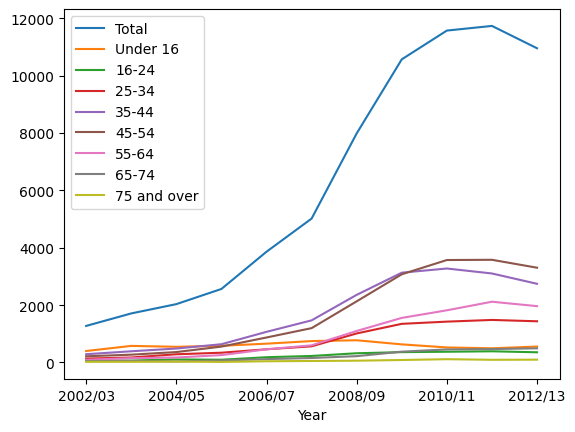

In [19]:
data_age.plot()

Ups. Ada masalah: Data asli kita berisi total yang menutupi bidang lainnya. Kita perlu menyingkirkannya.

---
**PARAMETERS**

The `axis, index, columns, level, inplace, errors` parameters are keyword arguments.

<img src="parameters.png" width="700">

---

**CONTOH KASUS 5 :**
>Bagaimana cara menghapus baris atau kolom tertentu?

**`DROP()`**

The drop() method removes the specified row or column.
- By specifying the column axis (axis='columns'), the drop() method removes the specified column.
- By specifying the row axis (axis='index'), the drop() method removes the specified row.

In [21]:
data_age_minus_total = data_age.drop('Total', axis=1)   # menghapus kolom 'Total'   # axis = 1 -> kolom

<AxesSubplot: xlabel='Year'>

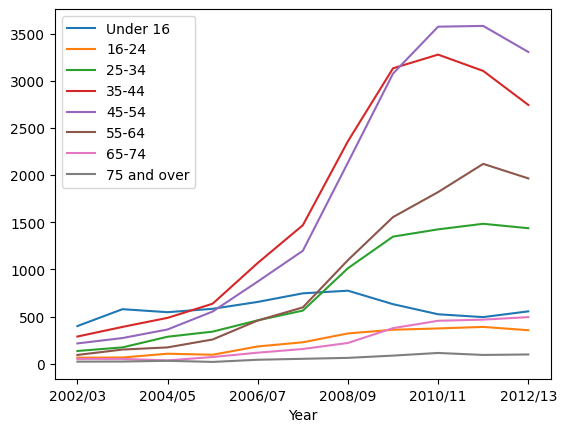

In [22]:
data_age_minus_total.plot()

Jauh lebih baik. Kita benar-benar dapat melihat kelompok usia individu sekarang. Bisakah kita melihat kelompok usia mana yang memiliki obesitas tertinggi?

Kembali ke pertanyaan awal kita: Are children getting fatter?

Mari kita buat plot sebagian kecil data: anak-anak di bawah usia 16 tahun dan orang dewasa dengan rentang usia 35-44 tahun.

**CONTOH KASUS 6 :**
> Data diambil dari Dataframe data_age yaitu data kolom 'Under 16' dan '35-44'.

<AxesSubplot:xlabel='Year'>

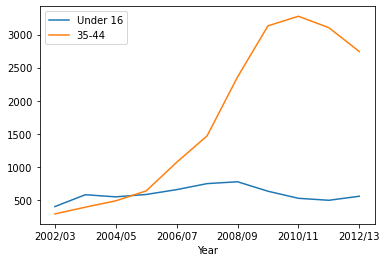

In [35]:
data_age['Under 16'].plot(label='Under 16', legend=True)
data_age['35-44'].plot(label="35-44", legend=True)

So who is getting fatter?

Ketika obesitas anak sedikit menurun, orang tua mereka membengkak. Jadi nampaknya para orang tua lebih perlu mengkhawatirkan diri sendiri daripada anak-anaknya.

## **TIME SERIES**
---
> Time Series / Deret Waktu adalah serangkaian pengamatan yang diambil pada waktu tertentu biasanya pada interval yang sama. 

`KEGUNAAN` : untuk memprediksi nilai masa depan berdasarkan nilai yang diamati sebelumnya.

Mengapa?
Karena dalam analisis ini, kita hanya memiliki satu variabel yaitu Waktu.

Kita dapat menganalisis data `Time Series` ini untuk mengekstrak statistik yang berarti dan karakteristik lainnya :
- Peramalan Bisnis
- Memahami perilaku masa lalu
- Rencanakan masa depan
- Evaluasi pencapaian saat ini

Komponen dari Time Series :
- Trend 
- Seasonality 
- Irregularity 
- Cyclic

### **`BASIC TIME-SERIES MANIPULATION`**

Pertama import libraries yang kita butuhkan dan gunakan untuk membuat date range.

**`DATETIME`**

Module to work with dates and times.

In [57]:
from datetime import datetime
import random

**CONTOH KASUS 1 :**
> Buat DatetimeIndex dengan range dari 1/01/2020 hingga 1/08/2020 dengan hourly frequency (H)

In [58]:
date_rng = pd.date_range(start='1/01/2020', end='1/08/2020', freq='H')

In [59]:
date_rng

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               ...
               '2020-01-07 15:00:00', '2020-01-07 16:00:00',
               '2020-01-07 17:00:00', '2020-01-07 18:00:00',
               '2020-01-07 19:00:00', '2020-01-07 20:00:00',
               '2020-01-07 21:00:00', '2020-01-07 22:00:00',
               '2020-01-07 23:00:00', '2020-01-08 00:00:00'],
              dtype='datetime64[ns]', length=169, freq='H')

timeseries-offset-aliases : https://pandas.pydata.org/docs/user_guide/timeseries.html#timeseries-offset-aliases

**CONTOH KASUS 2 :**
> Buat DataFrame df yang berisi DatetimeIndex date_rng dengan nama kolom 'date'.

In [60]:
df = pd.DataFrame(date_rng, columns=['date'])
df

,date
0,2020-01-01 00:00:00
1,2020-01-01 01:00:00
2,2020-01-01 02:00:00
3,2020-01-01 03:00:00
4,2020-01-01 04:00:00
...,...
164,2020-01-07 20:00:00
165,2020-01-07 21:00:00
166,2020-01-07 22:00:00
167,2020-01-07 23:00:00


source : https://www.interviewqs.com/ddi-code-snippets/create-df-random-integers

**CONTOH KASUS 3 :**

**create pandas dataframe with random numbers (1/2)**
>Buat kolom data yang mengandung random values dimulai dari angka 0 hingga 100 dan gabungkan dengan kolom date sebelumnya

**`RANDINT(START,STOP,..)`**

Method randint() untuk returns an integer number selected element from the specified range.

**`LEN()`**

len() is a built-in function in python.You can use the len() to get the length of the given string, array, list, tuple, dictionary, etc.

source : https://www.interviewqs.com/ddi-code-snippets/create-df-random-integers

In [61]:
df['data'] = np.random.randint(0,100,size=(len(date_rng)))

In [62]:
df.head()

,date,data
0,2020-01-01 00:00:00,93
1,2020-01-01 01:00:00,1
2,2020-01-01 02:00:00,75
3,2020-01-01 03:00:00,58
4,2020-01-01 04:00:00,58


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    169 non-null    datetime64[ns]
 1   data    169 non-null    int32         
dtypes: datetime64[ns](1), int32(1)
memory usage: 2.1 KB


**CONTOH KASUS 4 :**

**create pandas dataframe with random numbers (2/2)**
> Konversikan dataframe index menjadi datetime index dan tampilkan elemen pertama

Jika kita ingin melakukan manipulasi deret waktu/time series, 
kita perlu memiliki datetime index sehingga dataframe kita di indeks pada timestamp.

**`TO_DATETIME()`**

This function converts a scalar, array-like, Series or DataFrame/dict-like to a pandas datetime object.

In [64]:
df['datetime'] = pd.to_datetime(df['date'])
df.head()

,date,data,datetime
0,2020-01-01 00:00:00,93,2020-01-01 00:00:00
1,2020-01-01 01:00:00,1,2020-01-01 01:00:00
2,2020-01-01 02:00:00,75,2020-01-01 02:00:00
3,2020-01-01 03:00:00,58,2020-01-01 03:00:00
4,2020-01-01 04:00:00,58,2020-01-01 04:00:00


source : https://pandas.pydata.org/pandas-docs/version/1.0.1/reference/api/pandas.to_datetime.html

**CONTOH KASUS 5 :**
> Mengatur kolom `datetime` menjadi dataframe index dan kemudian menghapus kolom `date`

*df.index = untuk memeriksa dataframe index saat ini

In [65]:
df = df.set_index('datetime')
df.head()

,date,data
datetime,,
2020-01-01 00:00:00,2020-01-01 00:00:00,93
2020-01-01 01:00:00,2020-01-01 01:00:00,1
2020-01-01 02:00:00,2020-01-01 02:00:00,75
2020-01-01 03:00:00,2020-01-01 03:00:00,58
2020-01-01 04:00:00,2020-01-01 04:00:00,58


In [66]:
df.drop(['date'], axis=1, inplace=True)
df.head()

,data
datetime,
2020-01-01 00:00:00,93
2020-01-01 01:00:00,1
2020-01-01 02:00:00,75
2020-01-01 03:00:00,58
2020-01-01 04:00:00,58


Bagaimana jika ‘time’ stamps dalam data kita sebenarnya berjenis string vs. numerik?

**CONTOH KASUS 6 :**
> Konversi date_rng menjadi list of string dan kemudian ubah string tersebut menjadi Timestamp

**`STR()`**

The `str()` function converts values to a string form so they can be combined with other strings.

In [67]:
string_date_rng = [str(x) for x in date_rng]

In [47]:
string_date_rng

['2020-01-01 00:00:00',
 '2020-01-01 01:00:00',
 '2020-01-01 02:00:00',
 '2020-01-01 03:00:00',
 '2020-01-01 04:00:00',
 '2020-01-01 05:00:00',
 '2020-01-01 06:00:00',
 '2020-01-01 07:00:00',
 '2020-01-01 08:00:00',
 '2020-01-01 09:00:00',
 '2020-01-01 10:00:00',
 '2020-01-01 11:00:00',
 '2020-01-01 12:00:00',
 '2020-01-01 13:00:00',
 '2020-01-01 14:00:00',
 '2020-01-01 15:00:00',
 '2020-01-01 16:00:00',
 '2020-01-01 17:00:00',
 '2020-01-01 18:00:00',
 '2020-01-01 19:00:00',
 '2020-01-01 20:00:00',
 '2020-01-01 21:00:00',
 '2020-01-01 22:00:00',
 '2020-01-01 23:00:00',
 '2020-01-02 00:00:00',
 '2020-01-02 01:00:00',
 '2020-01-02 02:00:00',
 '2020-01-02 03:00:00',
 '2020-01-02 04:00:00',
 '2020-01-02 05:00:00',
 '2020-01-02 06:00:00',
 '2020-01-02 07:00:00',
 '2020-01-02 08:00:00',
 '2020-01-02 09:00:00',
 '2020-01-02 10:00:00',
 '2020-01-02 11:00:00',
 '2020-01-02 12:00:00',
 '2020-01-02 13:00:00',
 '2020-01-02 14:00:00',
 '2020-01-02 15:00:00',
 '2020-01-02 16:00:00',
 '2020-01-02 17:

Kita dapat mengonversi string menjadi timestamps dengan melihat formatnya, lalu melihat nilainya:

In [1]:
pd.to_datetime?

Object `pd.to_datetime` not found.


**CONTOH KASUS 7 :** : boolean, default Salah
> Bagaimana cara meningkatkan kecepatan saat  parsing?

**`INFER_DATETIME_FORMAT`**

Jika True dan parse_dates diaktifkan, panda akan mencoba menyimpulkan format string datetime di kolom, dan jika dapat disimpulkan, beralih ke metode parsing yang lebih cepat. Dalam beberapa kasus, ini dapat meningkatkan kecepatan penguraian sebesar 5-10x.

In [48]:
Timestamp_date_rng = pd.to_datetime(string_date_rng, infer_datetime_format=True)

In [49]:
Timestamp_date_rng

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               ...
               '2020-01-07 15:00:00', '2020-01-07 16:00:00',
               '2020-01-07 17:00:00', '2020-01-07 18:00:00',
               '2020-01-07 19:00:00', '2020-01-07 20:00:00',
               '2020-01-07 21:00:00', '2020-01-07 22:00:00',
               '2020-01-07 23:00:00', '2020-01-08 00:00:00'],
              dtype='datetime64[ns]', length=169, freq=None)

In [ ]:
from dateutil import parser
from datetime import datetime

L = ['2018-01-05', '2018-12-20', '2018-03-30', '2018-04-15']*5000

%timeit [parser.parse(i) for i in L]                   # 1.57 s
%timeit [datetime.strptime(i, '%Y-%m-%d') for i in L]  # 338 ms

In [ ]:
timestamp_date_rng

Tetapi bagaimana jika kita perlu mengubah format unique string?

Mari kita buat daftar tanggal yang berubah-ubah menjadi string dan mengubahnya menjadi timestamps:

In [69]:
string_date_rng_2 = ['June-01-2020', 'June-02-2020', 'June-03-2020']
string_date_rng_2

['June-01-2020', 'June-02-2020', 'June-03-2020']

**CONTOH KASUS 8 :**
> Bagaimana cara membuat datetime object dari string yang diberikan?

**`STRPTIME()`**

Method `strptime()` to creates a datetime object from the given string

In [71]:
Timestamp_date_rng_2 = [datetime.strptime(x, '%B-%d-%Y')
                        for x in string_date_rng_2]

# %d = hari
# %B = bulan
# %Y = tahun

---

In [72]:
Timestamp_date_rng_2

[datetime.datetime(2020, 6, 1, 0, 0),
 datetime.datetime(2020, 6, 2, 0, 0),
 datetime.datetime(2020, 6, 3, 0, 0)]

Seperti apa jadinya jika kita memasukkan ini ke dalam data frame?

In [73]:
# menaruh list[datetime] ke dalam kolom 'date'
df2 = pd.DataFrame(Timestamp_date_rng_2, columns=['date'])

In [74]:
df2

,date
0,2020-06-01
1,2020-06-02
2,2020-06-03


Kembali ke data frame asli kita, mari kita lihat datanya dengan parsing pada timestamp index:

Katakanlah kita hanya ingin melihat data di mana tanggalnya adalah tanggal 2 setiap bulannya, kita bisa menggunakan indeks seperti di bawah ini.

**CONTOH KASUS 9 :**
> Bagaimana cara mengambil data berdasarkan hari dan tanggal tertentu?

In [87]:
# buat hapus kolom df.drop('rolling_sum', axis=1, inplace=True)

In [90]:
# berdasarkan hari
df[df.index.day == 2].head()

,data
datetime,
2020-01-02 00:00:00,96
2020-01-02 01:00:00,52
2020-01-02 02:00:00,87
2020-01-02 03:00:00,23
2020-01-02 04:00:00,10


Kita juga bisa langsung memanggil tanggal yang ingin kita lihat melalui index dari data frame:

In [91]:
# berdasarkan tanggal
df.loc['2020-01-03'].head()

,data
datetime,
2020-01-03 00:00:00,15
2020-01-03 01:00:00,59
2020-01-03 02:00:00,86
2020-01-03 03:00:00,29
2020-01-03 04:00:00,59


Bagaimana dengan memilih data di antara tanggal tertentu?

In [92]:
# berdasarkan rentang tanggal
df.loc['2020-01-04':'2020-01-06'].head()

,data
datetime,
2020-01-04 00:00:00,15
2020-01-04 01:00:00,3
2020-01-04 02:00:00,22
2020-01-04 03:00:00,33
2020-01-04 04:00:00,30


**CONTOH KASUS 10 :**
> Bagaimana cara merangkum data berdasarkan waktu?

**`RESAMPLE()`**

Method `resample()` is used to summarize data by date or time :

        df.resample('D').sum()

Note that we can resample the time series data by various time periods, including:

- S: Seconds
- min: Minutes
- H: Hours
- D: Day
- W: Week
- M: Month
- Q: Quarter
- A: Year

source : https://www.earthdatascience.org/courses/use-data-open-source-python/use-time-series-data-in-python/date-time-types-in-pandas-python/resample-time-series-data-pandas-python/

In [93]:
df.resample('D').mean()

,data
datetime,
2020-01-01,46.166667
2020-01-02,48.083333
2020-01-03,51.750000
2020-01-04,33.416667
2020-01-05,53.500000
2020-01-06,47.000000
2020-01-07,48.041667
2020-01-08,76.000000


**`ROLLING()`**

Method `rolling()` is used to provide rolling window calculations

In [94]:
df['rolling_sum'] = df.rolling(3).sum()

In [95]:
df.head()

,data,rolling_sum
datetime,,
2020-01-01 00:00:00,93,NaN
2020-01-01 01:00:00,1,NaN
2020-01-01 02:00:00,75,169.0
2020-01-01 03:00:00,58,134.0
2020-01-01 04:00:00,58,191.0


**`FILLNA()`**

Fill NA/NaN values using the specified method.

Parameters:

`method` = **{‘backfill’, ‘bfill’, ‘pad’, ‘ffill’, None}, default None**

Method to use for filling holes in reindexed Series pad / ffill: propagate last valid observation forward to next valid backfill / bfill: use next valid observation to fill gap.

In [110]:
df.drop('rolling_sum_backfilled', axis=1, inplace=True)   

In [111]:
df['rolling_sum_backfilled'] = df['rolling_sum'].fillna(method='backfill')

In [112]:
df.head()

,data,rolling_sum,rolling_sum_backfilled
datetime,,,
2020-01-01 00:00:00,93,NaN,169.0
2020-01-01 01:00:00,1,NaN,169.0
2020-01-01 02:00:00,75,169.0,169.0
2020-01-01 03:00:00,58,134.0,134.0
2020-01-01 04:00:00,58,191.0,191.0


### **`TIME-SERIES ON DATASET`**

#### **GERMANY ELECTRICITY POWER FOR 2006-2017**

**ABOUT :**

Total konsumsi listrik, produksi tenaga angin, dan produksi tenaga surya di seluruh negara jerman selama 2006-2017

**Features :**

Electricity production and consumption are reported as daily totals in gigawatt-hours (GWh). The columns of the data file are:

- Date — The date (yyyy-mm-dd format)
- Consumption — Electricity consumption in GWh
- Wind — Wind power production in GWh
- Solar — Solar power production in GWh
- Wind+Solar — Sum of wind and solar power production in GWh

KAGGLE : https://www.kaggle.com/datasets/mvianna10/germany-electricity-power-for-20062017

#### **EXPLORE DATA**

In [114]:
opsd_daily = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/opsd_germany_daily.csv')
opsd_daily.shape

(4383, 5)

In [116]:
opsd_daily.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [117]:
opsd_daily.tail()

,Date,Consumption,Wind,Solar,Wind+Solar
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714
4382,2017-12-31,1107.11488,721.176,19.980,741.156


**CONTOH KASUS 1 :**
> Bagaimana cara mengatur kolom Date sebagai index DataFrame?

In [122]:
# mengatur kolom date sebagai index dataframe
opsd_daily = opsd_daily.set_index('Date')
opsd_daily.head(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN


In [125]:
# menampilkan list index
opsd_daily.index

Index(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04', '2006-01-05',
       '2006-01-06', '2006-01-07', '2006-01-08', '2006-01-09', '2006-01-10',
       ...
       '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-26',
       '2017-12-27', '2017-12-28', '2017-12-29', '2017-12-30', '2017-12-31'],
      dtype='object', name='Date', length=4383)

In [126]:
opsd_daily = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/opsd_germany_daily.csv',
                        index_col=0,
                        parse_dates=True)

In [127]:
opsd_daily.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


**CONTOH KASUS 2 :**
> Bagaimana cara membuat kolom dengan mengambil data dari indexnya yaitu datetimeIndex?

In [70]:
# membuat kolom dengan mengambil data dari indexnya

opsd_daily['Year'] = opsd_daily.index.year
opsd_daily['Month'] = opsd_daily.index.month
opsd_daily['Weekday'] = opsd_daily.index.weekday

In [71]:
opsd_daily.head()

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,2006,1,6
2006-01-02,1380.521,NaN,NaN,NaN,2006,1,0
2006-01-03,1442.533,NaN,NaN,NaN,2006,1,1
2006-01-04,1457.217,NaN,NaN,NaN,2006,1,2
2006-01-05,1477.131,NaN,NaN,NaN,2006,1,3


**CONTOH KASUS 3 :**
> Bagaimana cara mengetahui data pada tanggal, bulan, dan tahun tertentu?

In [72]:
# berdasarkan tanggal, bulan, dan tahun tertentu
opsd_daily.loc['2017-08-10']

Consumption    1351.491
Wind            100.274
Solar            71.160
Wind+Solar      171.434
Year           2017.000
Month             8.000
Weekday           3.000
Name: 2017-08-10 00:00:00, dtype: float64

In [73]:
# berdasarkan rentang tanggal tertentu
opsd_daily.loc['2014-01-20':'2014-01-22']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2014-01-20,1590.687,78.647,6.371,85.018,2014,1,0
2014-01-21,1624.806,15.643,5.835,21.478,2014,1,1
2014-01-22,1625.155,60.259,11.992,72.251,2014,1,2


In [74]:
# berdasarkan tahun tertentu
opsd_daily.loc['2006']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,2006,1,6
2006-01-02,1380.521,NaN,NaN,NaN,2006,1,0
2006-01-03,1442.533,NaN,NaN,NaN,2006,1,1
2006-01-04,1457.217,NaN,NaN,NaN,2006,1,2
2006-01-05,1477.131,NaN,NaN,NaN,2006,1,3
...,...,...,...,...,...,...,...
2006-12-27,1284.676,NaN,NaN,NaN,2006,12,2
2006-12-28,1314.603,NaN,NaN,NaN,2006,12,3
2006-12-29,1274.646,NaN,NaN,NaN,2006,12,4


In [75]:
# berdasarkan tahun dan bulan tertentu
opsd_daily.loc['2012-02']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2012-02-01,1511.866,199.607,43.502,243.109,2012,2,2
2012-02-02,1563.407,73.469,44.675,118.144,2012,2,3
2012-02-03,1563.631,36.352,46.510,82.862,2012,2,4
2012-02-04,1372.614,20.551,45.225,65.776,2012,2,5
2012-02-05,1279.432,55.522,54.572,110.094,2012,2,6
2012-02-06,1574.766,34.896,55.389,90.285,2012,2,0
2012-02-07,1615.078,100.312,19.867,120.179,2012,2,1
2012-02-08,1613.774,93.763,36.930,130.693,2012,2,2
2012-02-09,1591.532,132.219,19.042,151.261,2012,2,3


**CONTOH KASUS 4 :**
> Visualisasikan Data Konsumsi Listrik dengan ketebalan garis 0.5

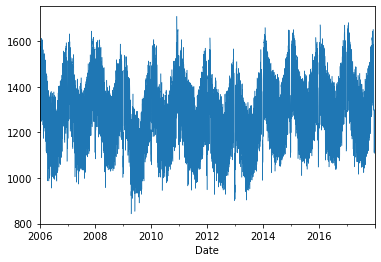

In [76]:
opsd_daily['Consumption'].plot(linewidth=0.5);
# linewidth = untuk menyesuaikan ketebalan garis

**CONTOH KASUS 5 :**
> Visualisasikan berdasarkan kolom tertentu dengan marker, aplha, linestyle, dan figsize

Data :
1. Konsumsi Listrik
2. Produksi tenaga solar
3. Produksi tenaga surya 

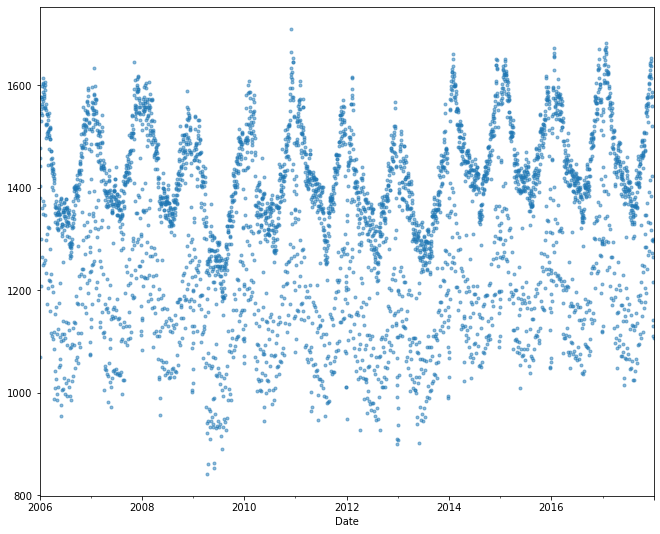

In [77]:
# Data Konsumsi Listrik
opsd_daily['Consumption'].plot(marker='.',
                                alpha=0.5,
                                linestyle='None',
                                figsize=(11, 9));

# marker = penanda
# alpha = atur transparansi
# linestyle = atur gaya garis
# figsize = atur ukuran 

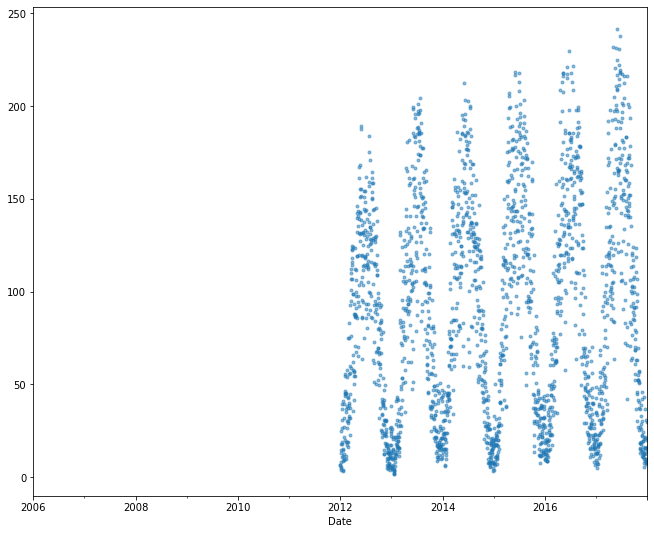

In [78]:
# Data Produksi Tenaga Solar
opsd_daily['Solar'].plot(marker='.',
                        alpha=0.5,
                        linestyle='None',
                        figsize=(11, 9));

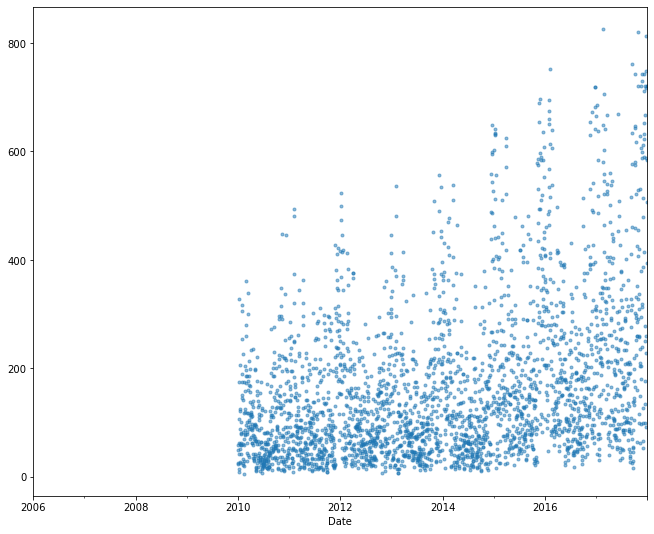

In [79]:
# Data Produksi Tenaga Angin
opsd_daily['Wind'].plot(marker='.',
                        alpha=0.5,
                        linestyle='None',
                        figsize=(11, 9));

**CONTOH KASUS 6 :**
> Visualisasikan berdasarkan tanggal, bulan, dan tahun tertentu dengan marker, aplha, linestyle, dan figsize

Data :
1. Konsumsi Listrik
2. Produksi tenaga solar
3. Produksi tenaga surya 

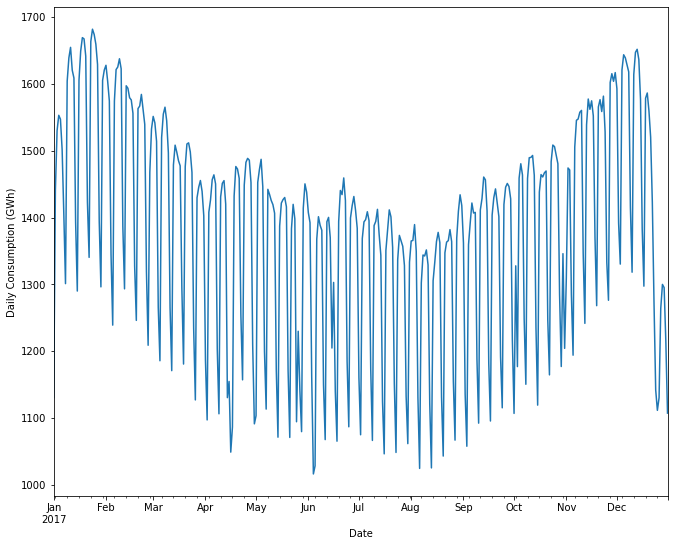

In [80]:
# berdasarkan tahun tertentu
ax = opsd_daily.loc['2017', 'Consumption'].plot(figsize=(11, 9))

ax.set_ylabel('Daily Consumption (GWh)');

# set_ylabel = untuk memberikan label pada y

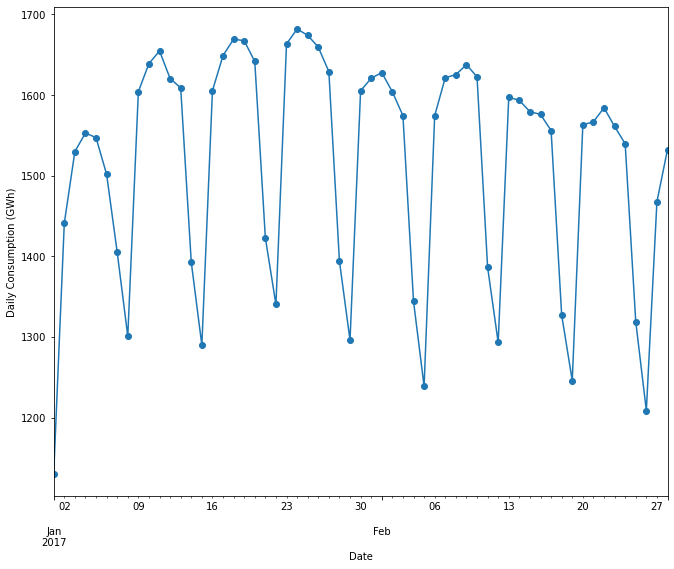

In [81]:
# berdasarkan rentang tanggal dan bulan tertentu
ax = opsd_daily.loc['2017-01':'2017-02',
                    'Consumption'].plot(marker='o',
                                        linestyle='-',
                                        figsize=(11, 9))

ax.set_ylabel('Daily Consumption (GWh)');

<AxesSubplot:title={'center':'Consumption'}, xlabel='Month'>

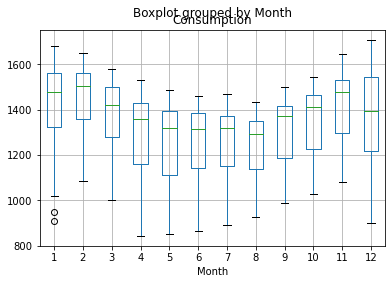

In [82]:
# berdasarkan bulan menggunakan boxplot
opsd_daily.boxplot(column=['Consumption'],
                   by='Month')

# column = memilih kolom
# by = memilih waktu spt month, weekday,dll.

<AxesSubplot:title={'center':'Solar'}, xlabel='Month'>

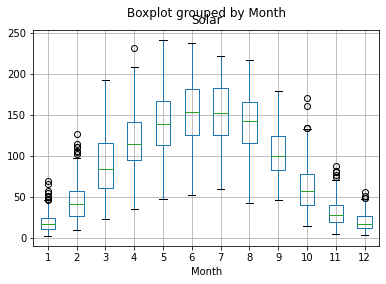

In [83]:
opsd_daily.boxplot(column=['Solar'],
                   by='Month')

<AxesSubplot:title={'center':'Wind'}, xlabel='Month'>

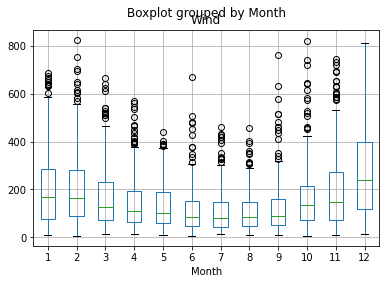

In [84]:
opsd_daily.boxplot(column=['Wind'],
                   by='Month')

<AxesSubplot:title={'center':'Consumption'}, xlabel='Weekday'>

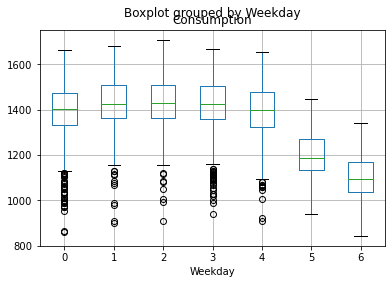

In [85]:
opsd_daily.boxplot(column=['Consumption'],
                   by='Weekday')

In [131]:
opsd_daily.head(8)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN
2006-01-06,1403.427,NaN,NaN,NaN
2006-01-07,1300.287,NaN,NaN,NaN
2006-01-08,1207.985,NaN,NaN,NaN


**CONTOH KASUS 7 :**
> Merangkum data Consumption berdasarkan data tiap minggunya

In [128]:
data_columns = ['Consumption', 'Wind', 'Solar', 'Wind+Solar']

opsd_weekly_mean = opsd_daily[data_columns].resample('W').mean()
opsd_weekly_mean

# resample('W') -> W disini maksudnya Week
# maksud mean disini adalah rata-rata tiap minggunya

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184000,NaN,NaN,NaN
2006-01-08,1381.300143,NaN,NaN,NaN
2006-01-15,1486.730286,NaN,NaN,NaN
2006-01-22,1490.031143,NaN,NaN,NaN
2006-01-29,1514.176857,NaN,NaN,NaN
...,...,...,...,...
2017-12-03,1536.236314,284.334286,18.320857,302.655143
2017-12-10,1554.824946,636.514714,16.440286,652.955000
2017-12-17,1543.856889,442.531857,18.143714,460.675571


Penjelasan :
1. 2006-01-01 minggu 1 = 1069.184000	
2. 2006-01-08 minggu 2 = 1381.300143

Pertanyaannya : Pada minggu-2 dihitung mean dari rentang tanggal berapa?

Jawabannya : mean dari rentang 2006-01-02 s/d 2006-01-08

Mean = 9.669.101 / 7 = 1.381.300,142857143


In [132]:
# melihat banyak data
print(opsd_daily.shape[0])
print(opsd_weekly_mean.shape[0])                        

4383
627


: 

**CONTOH KASUS 8 :**
> Visualisasikan berdasarkan tanggal-bulan-tahun dengan marker, markersize, linestyle, linewidth, figsize dan menggunakan start:end sebagai pengganti tanggal-bulan-tahun

<AxesSubplot:xlabel='Date'>

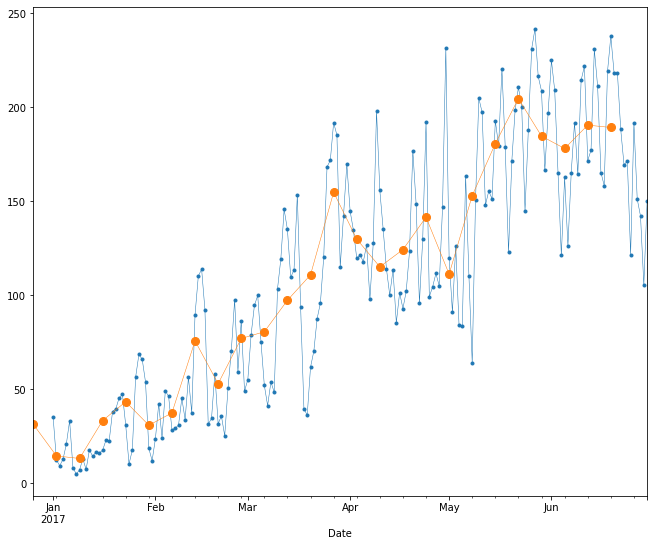

In [88]:
start, end = '2017-01', '2017-06'

# DATA TIAP HARINYA
opsd_daily.loc[start:end, 'Solar'].plot(marker='.',
                                        linestyle='-',
                                        linewidth=0.5,
                                        figsize=(11, 9))

# DATA TIAP MINGGUNYA
opsd_weekly_mean.loc[start:end, 'Solar'].plot(marker='o',
                                                markersize=8,
                                                linestyle='-',
                                                linewidth=0.5,
                                                figsize=(11, 9))